In [10]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import seaborn as sns
import sys
import scipy.stats as sc
import pandas as pd
import ffl

sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, Chi2Regression, BinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax  # Useful functions to print fit results on figure

sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 1)
sns.set_palette(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['figure.figsize'] = (16, 9)


# 1.1 - An electronic device depends on three components each with independent probabilities 0.009, 0.016, and 0.027 of failing per year

## 1.1.1 What is the probability that the device will not fail in the first year?

For the device to not fail, each component has to last the year. This can be expressed like this where the subscribt denotes the components

$P_{1, \text{no fail}} = 1 - 0.009$

$P_{2, \text{no fail}} = 1 - 0.016$

$P_{3, \text{no fail}} = 1 - 0.027$

Then the total probability for the deive not to fail is

$$ P(\text{no fail}) = P_1 \times P_2 \times P_3 = 0.95 $$


In [11]:
r1 = 0.009
r2 = 0.016
r3 = 0.027

P_no_fail = (1 - r1) * (1 - r2) * (1 - r3)
print(P_no_fail)

0.948815112


## 1.1.2 After how many years is the probability of failure greater than 50%

For each year the chance of each component not failing is $1-P_i$ which means that for $n$ years the chance of that same component not failing is $(1- P_i)^n$ which makes the total probability for not failing:

$$ P(n, \text{no fail}) = (P_1)^n \times (P_2)^n \times (P_3)^n $$

As shown by the graph above. 

14


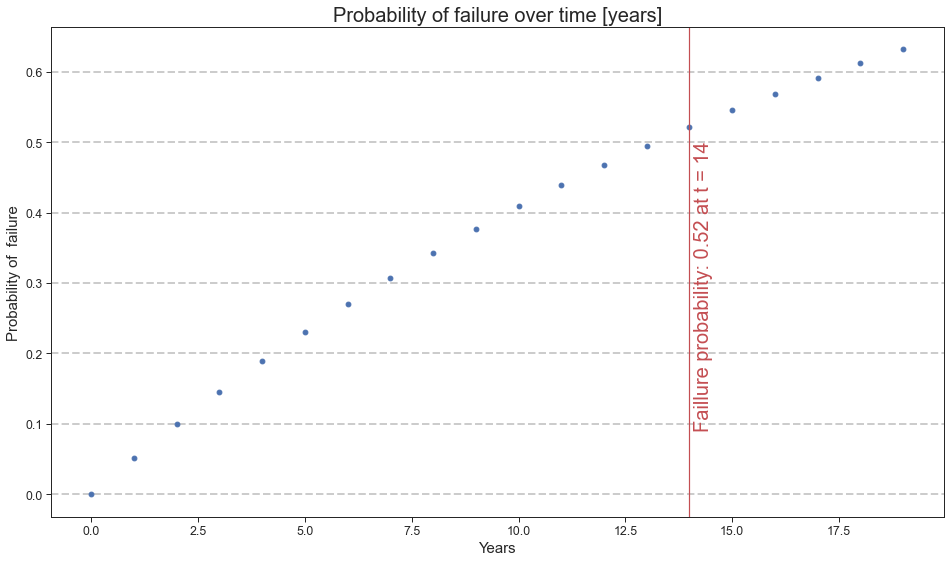

In [12]:
def fail_prob_year(y, r1, r2, r3):
    return 1 - (1 - r1)**y * (1 - r2)**y * (1 - r3)**y

x_range = np.arange(0, 20, 1)
y_range = fail_prob_year(x_range, r1, r2, r3)

# Find x where probability of failure is greater than 0.5
x_i = np.where(y_range > 0.5)[0][0]
print(x_i)



fig, ax = plt.subplots()
ax.plot(x_range, y_range, 'o', label = 'Data')

ax.axvline(x = x_i, color = 'r', label = '50% failure probability')
ax.text(x_i + 0.1, 0.095, f'Faillure probability: {y_range[x_i]:.2f} at t = {x_range[x_i]}', rotation = 90, color = 'r', fontsize = 20)
ax.set_xlabel('Years', fontsize = 15)
ax.set_ylabel('Probability of  failure', fontsize =15)
ax.set_title('Probability of failure over time [years]', fontsize =20)


plt.savefig('saved_images/1_2_2.png')